### Collecting Data:

In [287]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [288]:
df = pd.read_csv(r"C:\Users\Isanaka.SaiKumar\Downloads\train_clean.csv")

In [289]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
5,30.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,4
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,2
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,1


In [290]:
print("Number of passengers in original data: " + str(len(df.index)))

Number of passengers in original data: 891


### Analyzing the Data:

<AxesSubplot:xlabel='Survived', ylabel='count'>

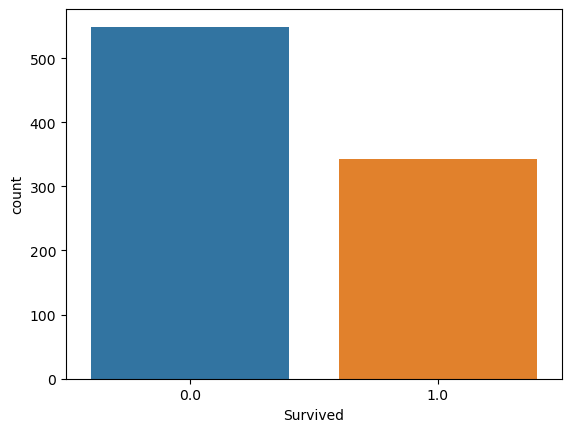

In [291]:
sn.countplot(x = 'Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

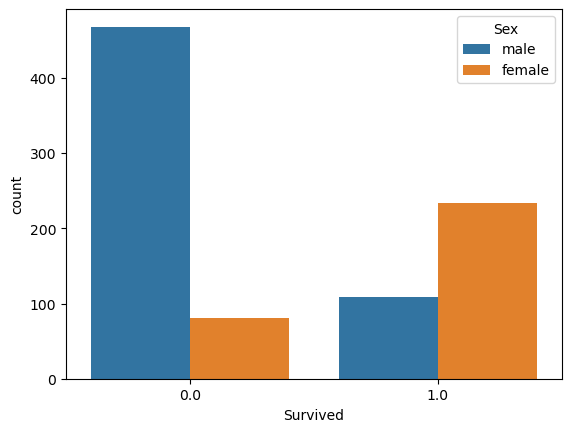

In [292]:
sn.countplot(x = 'Survived', hue = 'Sex', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

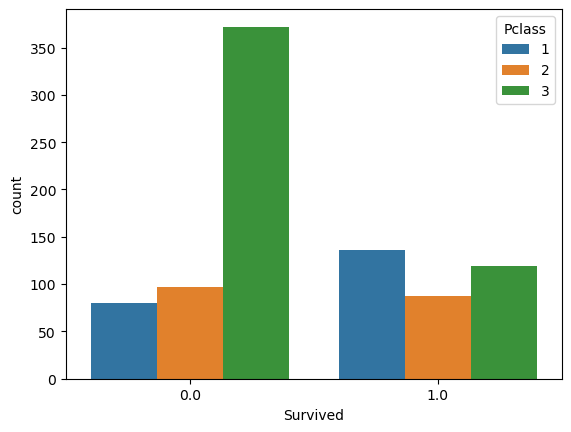

In [293]:
sn.countplot(x = 'Survived', hue = 'Pclass', data = df)

<AxesSubplot:ylabel='Frequency'>

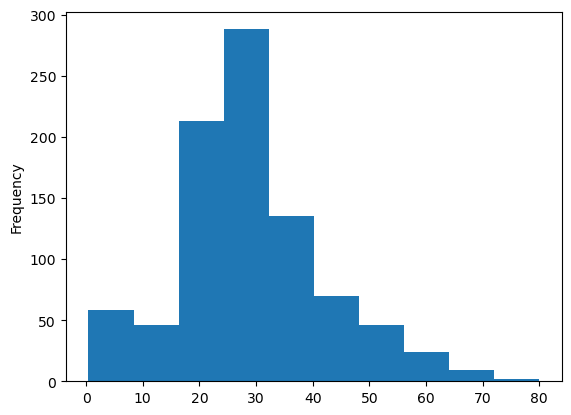

In [294]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

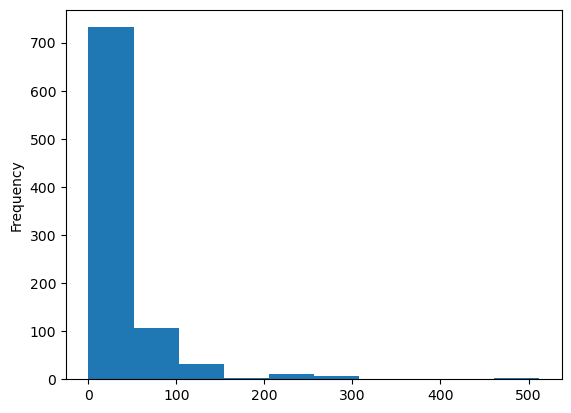

In [295]:
df['Fare'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

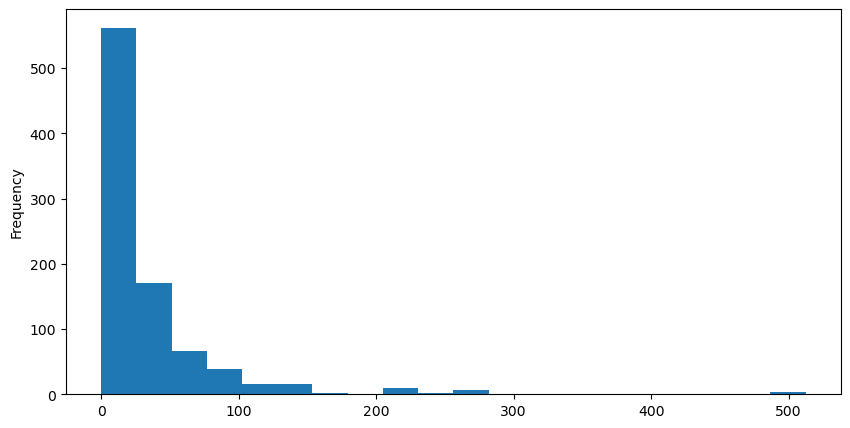

In [296]:
df['Fare'].plot.hist(bins = 20, figsize = (10,5))

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

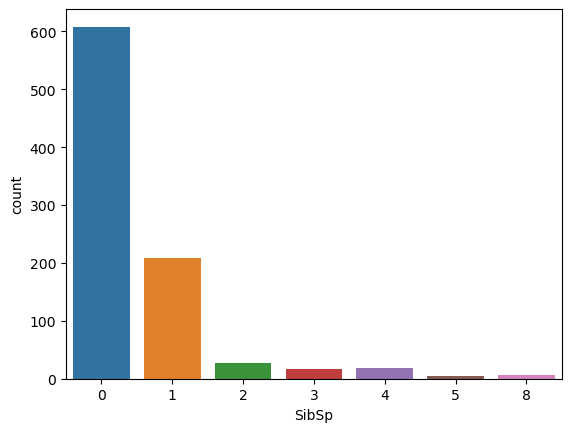

In [298]:
sn.countplot(x = 'SibSp', data = df)

### Data Wrangling(Cleaning the Data):

In [299]:
df.isnull()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,True,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,True,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [300]:
df.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

<AxesSubplot:>

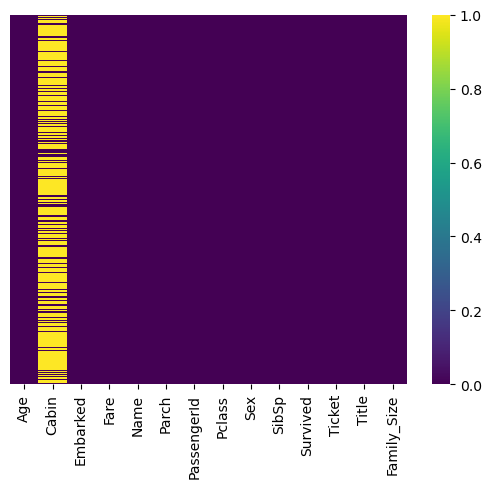

In [301]:
sn.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

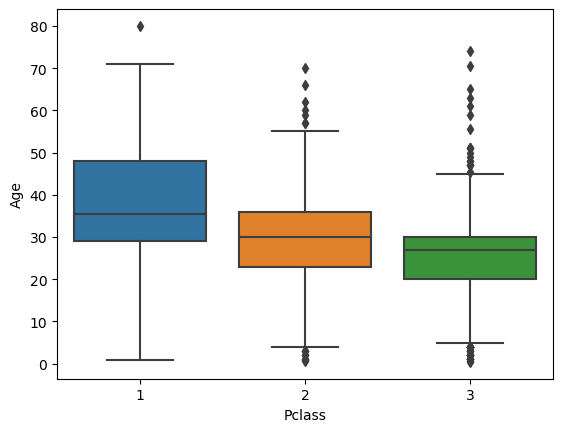

In [302]:
sn.boxplot(x = 'Pclass', y = 'Age', data = df)

In [303]:
df.drop('Cabin', axis = 1)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


In [304]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


In [305]:
df.drop('Cabin', axis = 1, inplace = True)

In [306]:
df

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


In [307]:
df.dropna(inplace = True)

In [308]:
df

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


<AxesSubplot:>

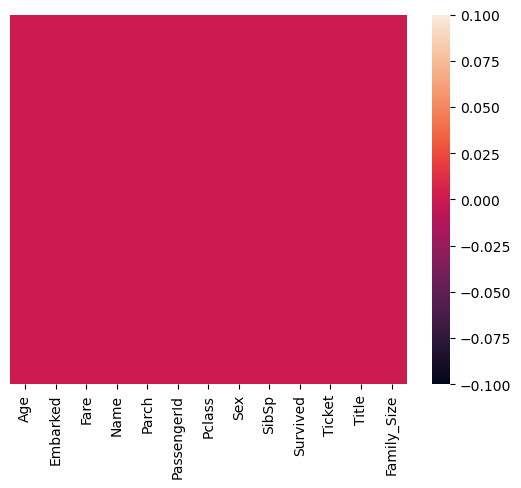

In [309]:
sn.heatmap(df.isnull(), yticklabels = False)

<AxesSubplot:>

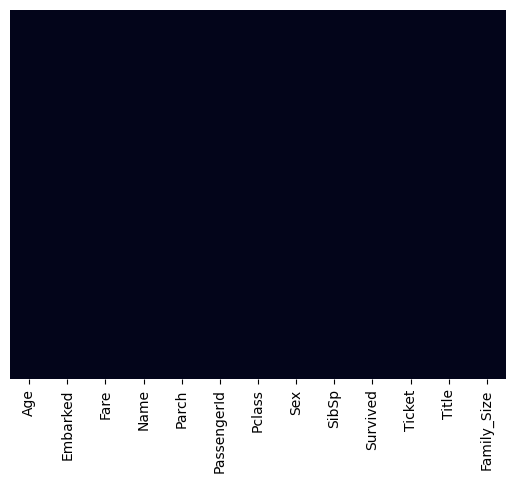

In [310]:
sn.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [311]:
df.isnull().sum()

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
Family_Size    0
dtype: int64

In [312]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [313]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [314]:
embark = pd.get_dummies(df['Embarked'], drop_first = True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [315]:
Pcl = pd.get_dummies(df['Pclass'], drop_first = True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [316]:
df.head(5)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [317]:
df = pd.concat([df, sex, embark, Pcl], axis = 1)

In [318]:
df.head(5)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,male,Q,S,2,3
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1,1,0,1,0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,0,0,0,0,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,0,0,1,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1,0,0,1,0,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,1,0,1,0,1


In [319]:
df.drop(['Sex', 'Embarked', 'Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

In [320]:
df.head(5)

,Age,Fare,Parch,Pclass,SibSp,Survived,Title,Family_Size,male,Q,S,2,3
0,22.0,7.2500,0,3,1,0.0,Mr,1,1,0,1,0,1
1,38.0,71.2833,0,1,1,1.0,Mrs,1,0,0,0,0,0
2,26.0,7.9250,0,3,0,1.0,Miss,0,0,0,1,0,1
3,35.0,53.1000,0,1,1,1.0,Mrs,1,0,0,1,0,0
4,35.0,8.0500,0,3,0,0.0,Mr,0,1,0,1,0,1


In [321]:
df.drop(['Title', 'Family_Size'], axis = 1, inplace = True)

In [322]:
df.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,male,Q,S,2,3
0,22.0,7.2500,0,3,1,0.0,1,0,1,0,1
1,38.0,71.2833,0,1,1,1.0,0,0,0,0,0
2,26.0,7.9250,0,3,0,1.0,0,0,1,0,1
3,35.0,53.1000,0,1,1,1.0,0,0,1,0,0
4,35.0,8.0500,0,3,0,0.0,1,0,1,0,1


In [323]:
df.drop('Pclass', axis = 1, inplace = True)

In [324]:
df.head(5)

,Age,Fare,Parch,SibSp,Survived,male,Q,S,2,3
0,22.0,7.2500,0,1,0.0,1,0,1,0,1
1,38.0,71.2833,0,1,1.0,0,0,0,0,0
2,26.0,7.9250,0,0,1.0,0,0,1,0,1
3,35.0,53.1000,0,1,1.0,0,0,1,0,0
4,35.0,8.0500,0,0,0.0,1,0,1,0,1


### Train Data

In [333]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [334]:
from sklearn.model_selection import train_test_split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [339]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [341]:
logmodel.fit(X_train, y_train)

C:\Users\Isanaka.SaiKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=1000)

In [342]:
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 1.0.2


In [358]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   Fare    891 non-null    float64
 2   Parch   891 non-null    int64  
 3   SibSp   891 non-null    int64  
 4   male    891 non-null    uint8  
 5   Q       891 non-null    uint8  
 6   S       891 non-null    uint8  
 7   2       891 non-null    uint8  
 8   3       891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 32.3 KB


In [359]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [360]:
predictions = logmodel.predict(X_test)

C:\Users\Isanaka.SaiKumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [361]:
from sklearn.metrics import classification_report

In [363]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.81      0.88      0.84       157\n         1.0       0.81      0.71      0.76       111\n\n    accuracy                           0.81       268\n   macro avg       0.81      0.80      0.80       268\nweighted avg       0.81      0.81      0.81       268\n'

In [364]:
from sklearn.metrics import confusion_matrix

In [365]:
confusion_matrix(y_test, predictions)

array([[138,  19],
       [ 32,  79]], dtype=int64)

In [367]:
from sklearn.metrics import accuracy_score

In [369]:
accuracy_score(y_test, predictions)*100

80.97014925373134